# Global Energy Consumption for Fossil Fuels and Low - Carbon Resources

## Introduction
Global energy consumption is the amount of power used by different types of non-renewable and renewable energy source.

World energy supply and cosumption is based on global production, preparation of fuel, power generation and energy transport. Many countries need energy supply and consumption for its developpment, for its economic and also for its industrialization.

Energy consumption for some countries in the world is very high than others countries. The world needs to shift away from fossil fuels to an energy mix dominated by low-carbon sources of energy – renewable technologies and nuclear power. 

#### About the Dataset
The datasets used in this project is publicly accessible in [Our World in Data](https://ourworldindata.org/energy-production-consumption). Datasets contains the following characteristics and indicators:
- Data from 1900 to 2019
- 116 countries
- 8 types of energy sources (values in **Exajoule**)
    - Fossil fuels : Oil, Gas, Coal
    - Low carbon fuels: Solar, Hydro, Nuclear, Wind, Geo Biomass

### Aim of the Analysis

1. Global Energy Consumption for the years 1965 to 2019.
2. Decrease in fossil energy consumption for the past 10 years (2009 to 2019)
3. Finding the most promising renewable energy source for the past 20 years (1999 to 2019).
4. Which countries get the highest share of energy from low-carbon sources?
5. Analyzing low-carbon energy consumption for the year 2019, top consuming countries
6. Prediction of low-carbon energy resource consumption for the next 10 years.

The above EDA will give us an idea about which countries are putting efforts to shift towards a low-carbon, renewable energy source.

In [1]:
# Importing Data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#### Loading Data

In [2]:
energy_consumption_df = pd.read_csv("Energy Consumption By Source & Region.csv")
energy_consumption_df.head()

,Entity,Code,Year,Oil Consumption - EJ,Gas Consumption - EJ,Coal Consumption - EJ,Solar Consumption - EJ,Hydro Consumption - EJ,Nuclear Consumption - EJ,Wind Consumption - EJ,Geo Biomass Other - EJ
0,Algeria,DZA,1965,15.405264,7.430506,0.814101,0.0,1.111112,0.0,0.0,0.0
1,Algeria,DZA,1966,20.272721,7.719256,0.790841,0.0,0.986112,0.0,0.0,0.0
2,Algeria,DZA,1967,18.942046,7.488256,0.604760,0.0,1.138890,0.0,0.0,0.0
3,Algeria,DZA,1968,20.167318,7.873256,0.639651,0.0,1.563890,0.0,0.0,0.0
4,Algeria,DZA,1969,21.305947,10.351696,0.814101,0.0,1.002779,0.0,0.0,0.0


#### Data Cleaning

In [3]:
# Understanding the Basic Ground Information of My Data
def all_about_my_data(df):
    print("Here is some Basic Ground Info about your Data:\n")
    
    # Shape of the DataFrame
    print("Number of Instances:",df.shape[0])
    print("Number of Features:",df.shape[1])
    
    # Summary Stats
    print("\nSummary Stats:")
    print(df.describe())
    
    # Missing Value Inspection
    print("\nMissing Values:")
    print(df.isna().sum())

all_about_my_data(energy_consumption_df)

Here is some Basic Ground Info about your Data:

Number of Instances: 5515
Number of Features: 11

Summary Stats:
              Year  Oil Consumption - EJ  Gas Consumption - EJ  \
count  5515.000000           4139.000000           4145.000000   
mean   1993.522393           1011.463696            548.258342   
std      16.979473           4680.229995           2697.775400   
min    1900.000000              0.571998              0.000000   
25%    1981.000000             63.741789              8.403757   
50%    1995.000000            142.531989             51.675541   
75%    2007.500000            413.589372            223.762679   
max    2019.000000          53619.924660          39292.467570   

       Coal Consumption - EJ  Solar Consumption - EJ  Hydro Consumption - EJ  \
count            4145.000000             4145.000000             4145.000000   
mean              737.574797                3.540386              162.425080   
std              3686.446745               47.12157

In [4]:
energy_consumption_df = energy_consumption_df.drop(['Code'], axis = 1)
energy_consumption_df.head()

,Entity,Year,Oil Consumption - EJ,Gas Consumption - EJ,Coal Consumption - EJ,Solar Consumption - EJ,Hydro Consumption - EJ,Nuclear Consumption - EJ,Wind Consumption - EJ,Geo Biomass Other - EJ
0,Algeria,1965,15.405264,7.430506,0.814101,0.0,1.111112,0.0,0.0,0.0
1,Algeria,1966,20.272721,7.719256,0.790841,0.0,0.986112,0.0,0.0,0.0
2,Algeria,1967,18.942046,7.488256,0.604760,0.0,1.138890,0.0,0.0,0.0
3,Algeria,1968,20.167318,7.873256,0.639651,0.0,1.563890,0.0,0.0,0.0
4,Algeria,1969,21.305947,10.351696,0.814101,0.0,1.002779,0.0,0.0,0.0


In [5]:
energy_consumption_df.dtypes

Entity                       object
Year                          int64
Oil Consumption - EJ        float64
Gas Consumption - EJ        float64
Coal Consumption - EJ       float64
Solar Consumption - EJ      float64
Hydro Consumption - EJ      float64
Nuclear Consumption - EJ    float64
Wind Consumption - EJ       float64
Geo Biomass Other - EJ      float64
dtype: object

In [6]:
cols = energy_consumption_df.columns.str.replace('-.*',"")
cols = cols.str.replace(" ","_")
cols = cols.str.replace("_$","")
cols = list(cols.str.casefold())
cols

C:\Users\DELL\AppData\Local\Temp\ipykernel_5216\2169833035.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  cols = energy_consumption_df.columns.str.replace('-.*',"")
C:\Users\DELL\AppData\Local\Temp\ipykernel_5216\2169833035.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  cols = cols.str.replace("_$","")


['entity',
 'year',
 'oil_consumption',
 'gas_consumption',
 'coal_consumption',
 'solar_consumption',
 'hydro_consumption',
 'nuclear_consumption',
 'wind_consumption',
 'geo_biomass_other']

In [7]:
cols[0] = 'country'
cols

['country',
 'year',
 'oil_consumption',
 'gas_consumption',
 'coal_consumption',
 'solar_consumption',
 'hydro_consumption',
 'nuclear_consumption',
 'wind_consumption',
 'geo_biomass_other']

In [8]:
# Re-Assigning Feature Names
energy_consumption_df=energy_consumption_df.rename(columns=dict(zip(energy_consumption_df.columns,cols)))
energy_consumption_df.head()

,country,year,oil_consumption,gas_consumption,coal_consumption,solar_consumption,hydro_consumption,nuclear_consumption,wind_consumption,geo_biomass_other
0,Algeria,1965,15.405264,7.430506,0.814101,0.0,1.111112,0.0,0.0,0.0
1,Algeria,1966,20.272721,7.719256,0.790841,0.0,0.986112,0.0,0.0,0.0
2,Algeria,1967,18.942046,7.488256,0.604760,0.0,1.138890,0.0,0.0,0.0
3,Algeria,1968,20.167318,7.873256,0.639651,0.0,1.563890,0.0,0.0,0.0
4,Algeria,1969,21.305947,10.351696,0.814101,0.0,1.002779,0.0,0.0,0.0


In [9]:
# Dropping Years Before 1965
energy_consumption_df = energy_consumption_df[energy_consumption_df['year'] >= 1965]
energy_consumption_df.head()

,country,year,oil_consumption,gas_consumption,coal_consumption,solar_consumption,hydro_consumption,nuclear_consumption,wind_consumption,geo_biomass_other
0,Algeria,1965,15.405264,7.430506,0.814101,0.0,1.111112,0.0,0.0,0.0
1,Algeria,1966,20.272721,7.719256,0.790841,0.0,0.986112,0.0,0.0,0.0
2,Algeria,1967,18.942046,7.488256,0.604760,0.0,1.138890,0.0,0.0,0.0
3,Algeria,1968,20.167318,7.873256,0.639651,0.0,1.563890,0.0,0.0,0.0
4,Algeria,1969,21.305947,10.351696,0.814101,0.0,1.002779,0.0,0.0,0.0


In [10]:
# Fill NaN with 0
energy_consumption_df = energy_consumption_df.fillna(0)
og_df = energy_consumption_df.copy()
energy_consumption_df.head()

,country,year,oil_consumption,gas_consumption,coal_consumption,solar_consumption,hydro_consumption,nuclear_consumption,wind_consumption,geo_biomass_other
0,Algeria,1965,15.405264,7.430506,0.814101,0.0,1.111112,0.0,0.0,0.0
1,Algeria,1966,20.272721,7.719256,0.790841,0.0,0.986112,0.0,0.0,0.0
2,Algeria,1967,18.942046,7.488256,0.604760,0.0,1.138890,0.0,0.0,0.0
3,Algeria,1968,20.167318,7.873256,0.639651,0.0,1.563890,0.0,0.0,0.0
4,Algeria,1969,21.305947,10.351696,0.814101,0.0,1.002779,0.0,0.0,0.0


In [11]:
all_about_my_data(energy_consumption_df)

Here is some Basic Ground Info about your Data:

Number of Instances: 5450
Number of Features: 10

Summary Stats:
              year  oil_consumption  gas_consumption  coal_consumption  \
count  5450.000000      5450.000000      5450.000000       5450.000000   
mean   1994.256147       768.155640       416.978134        560.962850   
std      15.551644      4101.386149      2364.257058       3230.215241   
min    1965.000000         0.000000         0.000000          0.000000   
25%    1981.000000         6.619957         0.000000          0.000000   
50%    1995.000000        92.455329        20.846689         10.324600   
75%    2008.000000       276.772243       135.904711         92.521284   
max    2019.000000     53619.924660     39292.467570      44993.467100   

       solar_consumption  hydro_consumption  nuclear_consumption  \
count        5450.000000        5450.000000          5450.000000   
mean            2.692642         123.532469            91.741060   
std            

### 1. Global Energy Consumption from 1965 to 2019

In [12]:
world_consumption_df = energy_consumption_df[energy_consumption_df['country'] == 'World']
world_consumption_df.head()

,country,year,oil_consumption,gas_consumption,coal_consumption,solar_consumption,hydro_consumption,nuclear_consumption,wind_consumption,geo_biomass_other
5281,World,1965,18108.64332,6303.803972,16140.19120,0.0,2564.440729,70.943735,0.0,49.959018
5282,World,1966,19496.47113,6868.800021,16324.10691,0.0,2732.827289,95.648105,0.0,55.016730
5283,World,1967,20890.58046,7374.045272,16060.82258,0.0,2793.731823,113.905686,0.0,55.518296
5284,World,1968,22675.46603,8044.337930,16301.15972,0.0,2942.471820,144.758905,0.0,61.444619
5285,World,1969,24576.88446,8833.425133,16798.74928,0.0,3115.955885,171.620725,0.0,64.605508


Text(0.5, 1.0, 'World energy consumption through different sources \n')

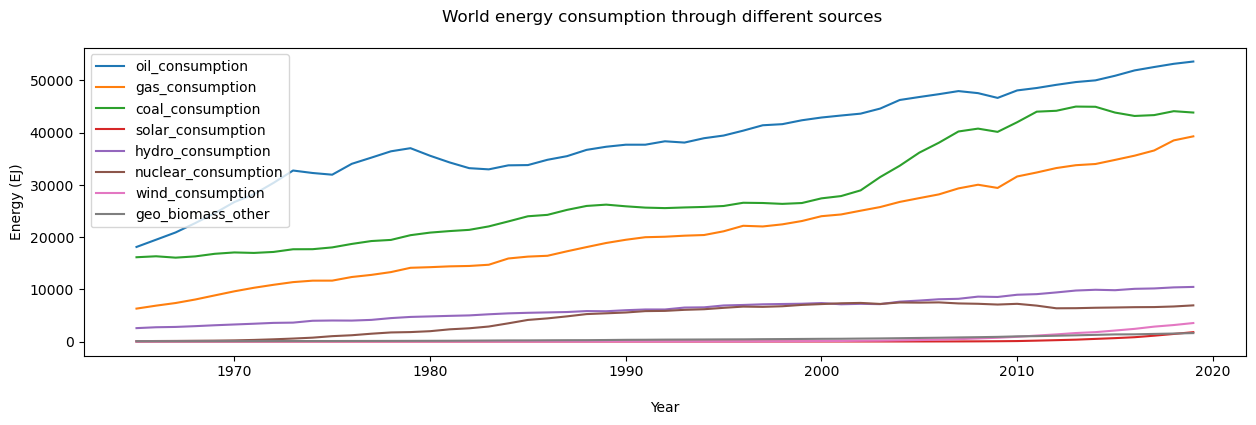

In [13]:
world_consumption_df.set_index('year', inplace=True)
world_consumption_df.plot(figsize = (15,4))
plt.xlabel("\nYear")
plt.ylabel("Energy (EJ)")
plt.title("World energy consumption through different sources \n")

Oil, coal and gas continue to be the most used energy resource. 

A dip is noted for the non-renewable energy sources in the year 2009, when the economic crisis hit the world. The years before and after 2009 have shown a large growth in energy consumption.

### 2. Decrease in Fossil Energy Consumption for the Past 10 years (2009 to 2019)

#####  Finding Top Decrease in Consumption for each Fossil Fuel from 2009 to 2019
Here We Analyze the Countries with the Maximum Decrease in Consumption for Each of the Resources. 

In [14]:
# New df for only Fossil Fuels
fossil_df = og_df[['country','year','oil_consumption', 'gas_consumption', 'coal_consumption']]
fossil_df.head()

,country,year,oil_consumption,gas_consumption,coal_consumption
0,Algeria,1965,15.405264,7.430506,0.814101
1,Algeria,1966,20.272721,7.719256,0.790841
2,Algeria,1967,18.942046,7.488256,0.604760
3,Algeria,1968,20.167318,7.873256,0.639651
4,Algeria,1969,21.305947,10.351696,0.814101


In [15]:
# Creating New df Representing Change
keys = fossil_df.keys()
keys = keys.drop('country')
keys = keys.drop('year')
country_list = []
source_list = []
value_list = []
for country in fossil_df.country.unique():
    country_df = fossil_df[fossil_df.country==country]
    if country_df[country_df.year==2009].empty or country_df[country_df.year==2019].empty:
        continue
    for key in keys:
        value_2009 = float(country_df[country_df.year==2009][key])
        value_2019 = float(country_df[country_df.year==2019][key])
        # Check for 0 Value and nan Value
        if value_2009!=0 and value_2009==value_2009:
            # Percentage Increase from 2009 till 2019
            per = ((value_2019-value_2009)/value_2009)*100
            country_list.append(country)
            source_list.append(key)
            value_list.append(per)
per_change_df = pd.DataFrame({'country':country_list,'source':source_list,'per_change_2009_2019':value_list})  
# Dropping the World Data
index_names = per_change_df[per_change_df['country'] == 'World'].index
per_change_df.drop(index_names, inplace = True)

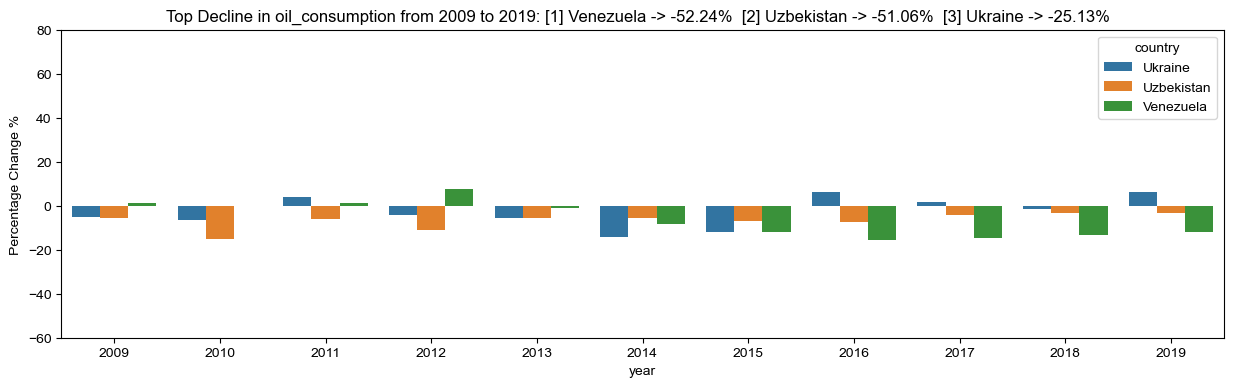

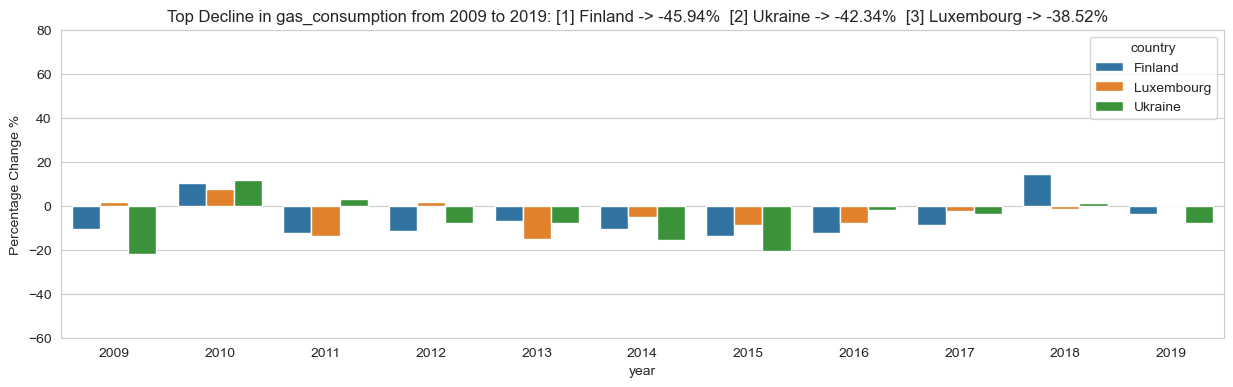

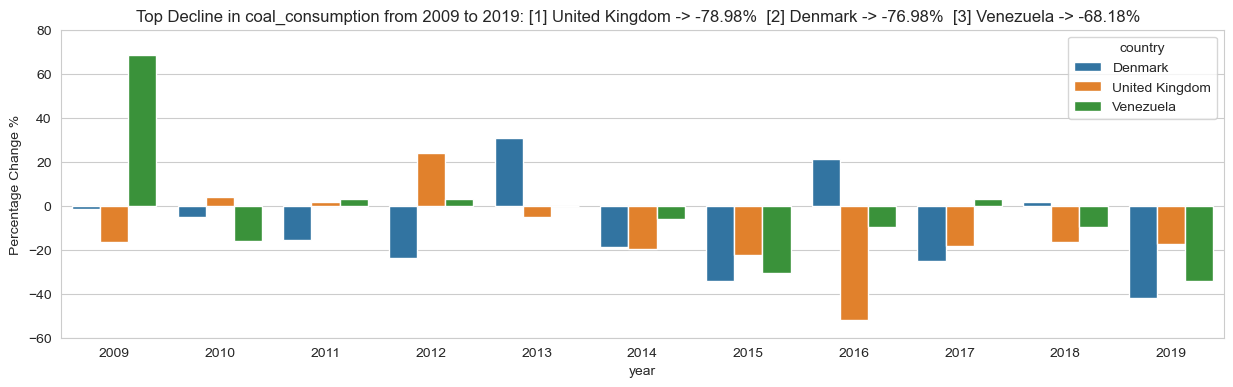

In [16]:
# Plotting
i = 0
for key in keys:
    per_change = per_change_df[per_change_df.source==key]
    # Sort Values in Decreasing Order [Highest on Top]
    per_change = per_change.sort_values(by='per_change_2009_2019', ascending=True).head(3)
    # Get Values from the Original Data Frame
    df_top_change = og_df[og_df['country'].isin(list(per_change.country))]
    df_top_change = df_top_change[['country','year',key]]
    values = df_top_change[key]
    # Calculating Percentage Change in Consumption and Multiply with 100 to get % Values
    df_top_change['Percentage Change %'] = values.pct_change()*100
    # Selecting only Rows with Year >= 2009
    df_top_change = df_top_change[df_top_change.year>=2009]
    plt.figure(i,figsize=(15,4))
    sns.barplot(x='year',y='Percentage Change %',hue='country',data=df_top_change)
    sns.set_style("whitegrid")
    # Creating Title to Show Top Nations that relatively Reduced their Consumption
    title = ''
    for i in range(len(list(per_change.country))):
        title+= f'[{i+1}] {list(per_change.country)[i]} -> {round(list(per_change.per_change_2009_2019)[i],2)}%  '
    plt.title(f'Top Decline in {key} from 2009 to 2019: {title}')
    plt.ylim(-60,80)
    plt.show()
    i+=1

The above plot gives us the countries with **maximum decrease** in consumption for all fossil fuels, in the past 10 years:
1. **Oil:** Ukraine, Uzbekistan, Venezuela
2. **Gas:** Finland, Luxembourg, Ukraine
3. **Coal:** Denmark, United Kingdom, Venezuela

### 3. Most Promising Environmental Friendly Energy Resource

In [17]:
world_df = og_df.copy()
index_names = world_df[world_df['country'] == 'World'].index
world_df.drop(index_names, inplace = True)
world_df.head()

,country,year,oil_consumption,gas_consumption,coal_consumption,solar_consumption,hydro_consumption,nuclear_consumption,wind_consumption,geo_biomass_other
0,Algeria,1965,15.405264,7.430506,0.814101,0.0,1.111112,0.0,0.0,0.0
1,Algeria,1966,20.272721,7.719256,0.790841,0.0,0.986112,0.0,0.0,0.0
2,Algeria,1967,18.942046,7.488256,0.604760,0.0,1.138890,0.0,0.0,0.0
3,Algeria,1968,20.167318,7.873256,0.639651,0.0,1.563890,0.0,0.0,0.0
4,Algeria,1969,21.305947,10.351696,0.814101,0.0,1.002779,0.0,0.0,0.0


In [18]:
# Dropping Oil, Coal and Gas as the Analysis is on Environmental Friendly Sources
world_df = og_df.groupby(['year'])['solar_consumption', 'hydro_consumption', 'nuclear_consumption', 'wind_consumption', 'geo_biomass_other'].apply(lambda x : x.sum())
# Keeping a Backup of the DataFrame
world_df_bup = world_df.copy()
world_df_bup.head()

C:\Users\DELL\AppData\Local\Temp\ipykernel_5216\2368983316.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  world_df = og_df.groupby(['year'])['solar_consumption', 'hydro_consumption', 'nuclear_consumption', 'wind_consumption', 'geo_biomass_other'].apply(lambda x : x.sum())


,solar_consumption,hydro_consumption,nuclear_consumption,wind_consumption,geo_biomass_other
year,,,,,
1965,0.0,5036.228450,141.887470,0.0,99.918036
1966,0.0,5361.564669,191.262877,0.0,110.033460
1967,0.0,5477.860024,227.705816,0.0,111.036593
1968,0.0,5766.934346,289.467810,0.0,122.889238
1969,0.0,6098.302649,343.099783,0.0,129.211017


In [19]:
# Years >= 1999
world_df_bup = world_df_bup.reset_index()
world_df_bup = world_df_bup[world_df_bup.year >=1999]
world_df_bup.head()

,year,solar_consumption,hydro_consumption,nuclear_consumption,wind_consumption,geo_biomass_other
34,1999,5.089681,13872.689918,14018.469461,117.511409,970.862385
35,2000,6.205154,14114.971908,14332.770247,173.844261,1016.605420
36,2001,7.703036,13658.458858,14641.947644,211.152439,1041.277816
37,2002,9.637711,13807.024027,14779.206156,285.976674,1113.655846
38,2003,12.259498,13675.545356,14387.729586,341.855001,1168.442447


In [20]:
sources = world_df_bup.keys()
sources = sources.drop('year')
sources

Index(['solar_consumption', 'hydro_consumption', 'nuclear_consumption',
       'wind_consumption', 'geo_biomass_other'],
      dtype='object')

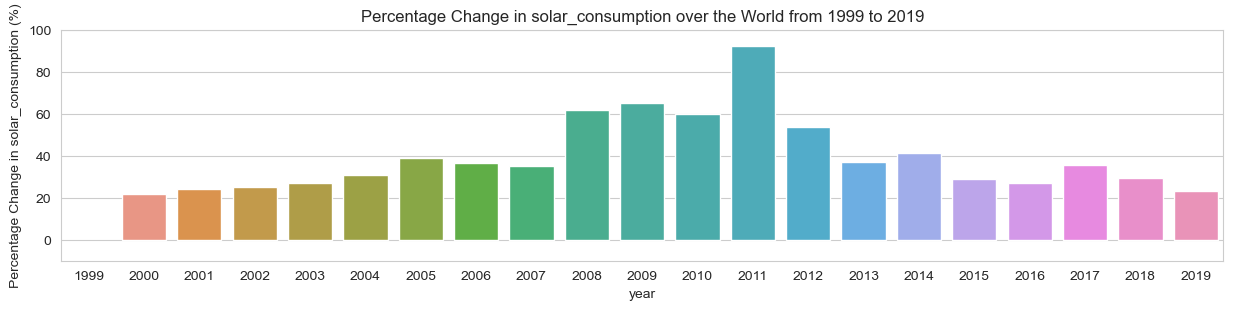

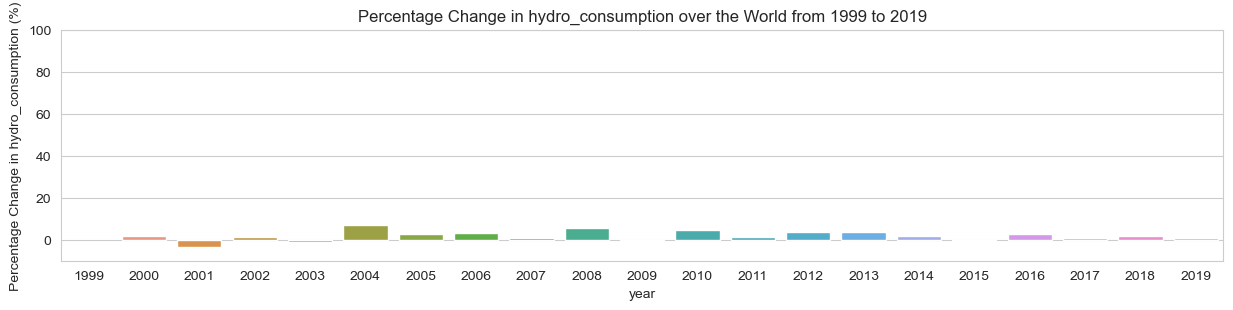

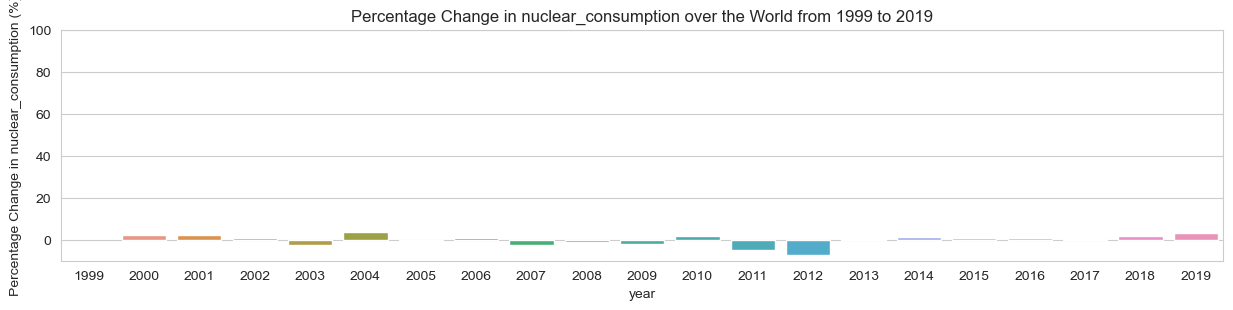

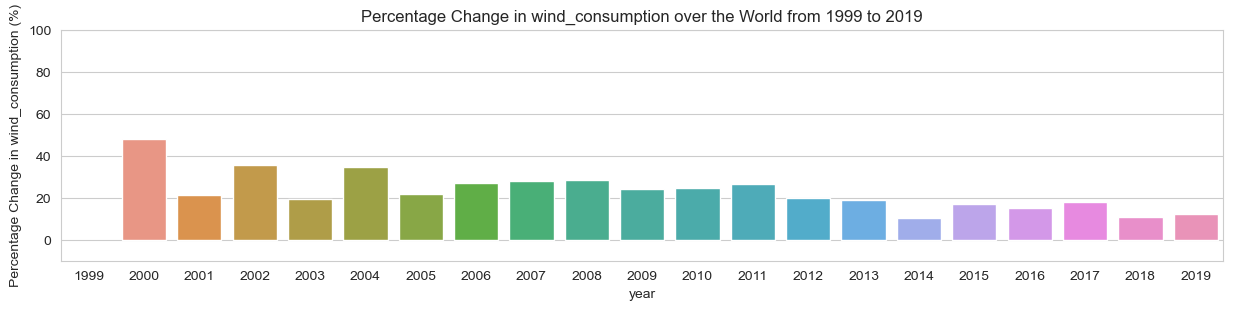

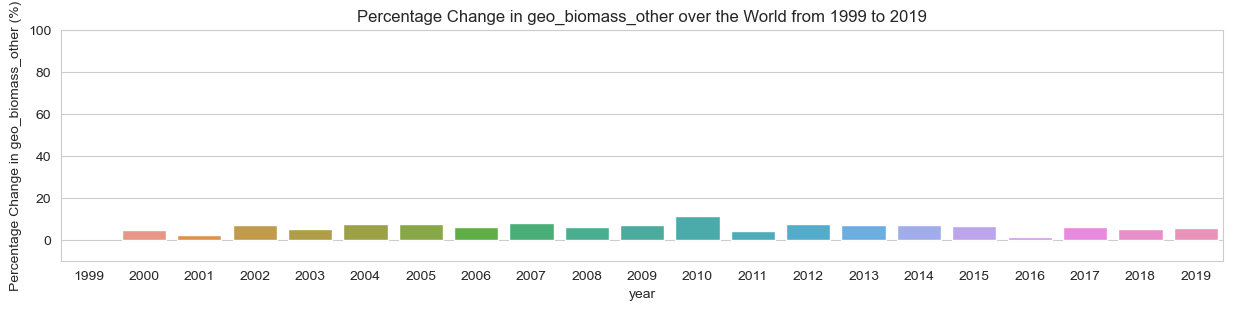

In [21]:
# Calculating Percentage Change for Each Resource Over Years from 1965 to 2019
i = 0
for source in sources:
    values = world_df_bup[source]
    # Calculate and Replace Percentage Change
    world_df_bup[f'Percentage Change in {source} (%)'] = values.pct_change()*100
    # Changing the Figure Size to Make the Axis Readable 
    plt.figure(i,figsize=(15,3))
    b = sns.barplot(x='year',y=f'Percentage Change in {source} (%)',data=world_df_bup)
    plt.title(f'Percentage Change in {source} over the World from 1999 to 2019')
    plt.ylim(-10, 100)
    plt.show()
    i+=1

After cleaning the plot and removing the outlier in the data, it is very clear that there is a promising rise in solar energy and then followed by wind energy. Nuclear energy saw a promising rise from 1965 till 1980s. But the rise was dialed down significantly due to policies on nuclear energy production caps by various nations.

Overall, we feel that solar energy is the most prominent and promising environmental friendly energy resource in the coming years. This shall be answered in the coming part of the notebook where we predict the energy source consumptions in the future.

### 4. Which Countries Get the Highest Share of Energy from Low - Carbon Sources? 

Now, We shift our focus to the countries consuming the highest percentage of renewable energy resources as part of their total energy consumption, thereby shifting to low carbon emission fuels.

Here we analyze the data for the year **2019**.

In [22]:
lowcarbon_df = energy_consumption_df.copy()
lowcarbon_df.set_index('year', inplace=True)
lowcarbon_df["total"] = lowcarbon_df.sum(axis=1)
# Add Nuclear + Renewable ==> low Carbon Consumption  ==> Plot ONLY One Graph
lowcarbon_df = lowcarbon_df.reset_index()
lowcarbon_df.head()

C:\Users\DELL\AppData\Local\Temp\ipykernel_5216\1716435689.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  lowcarbon_df["total"] = lowcarbon_df.sum(axis=1)


,year,country,oil_consumption,gas_consumption,coal_consumption,solar_consumption,hydro_consumption,nuclear_consumption,wind_consumption,geo_biomass_other,total
0,1965,Algeria,15.405264,7.430506,0.814101,0.0,1.111112,0.0,0.0,0.0,24.760983
1,1966,Algeria,20.272721,7.719256,0.790841,0.0,0.986112,0.0,0.0,0.0,29.768930
2,1967,Algeria,18.942046,7.488256,0.604760,0.0,1.138890,0.0,0.0,0.0,28.173953
3,1968,Algeria,20.167318,7.873256,0.639651,0.0,1.563890,0.0,0.0,0.0,30.244114
4,1969,Algeria,21.305947,10.351696,0.814101,0.0,1.002779,0.0,0.0,0.0,33.474522


In [23]:
lowcarbon = ['solar_consumption', 'nuclear_consumption', 'hydro_consumption', 'wind_consumption', 'geo_biomass_other']
# LowCarbon_df = Energy_consumption_df.copy()
lowcarbon_df['lowcarbon_consumption'] = lowcarbon_df[lowcarbon].sum(axis=1)
lowcarbon_df = lowcarbon_df[lowcarbon_df['year'] == 2019]
lowcarbon_df = lowcarbon_df.drop(columns=['year'])
lowcarbon_df.set_index('country', inplace=True)
# Drop Rows where Total = 0
lowcarbon_df = lowcarbon_df[lowcarbon_df['total']!= 0]
lowcarbon_df.reset_index().head()

,country,oil_consumption,gas_consumption,coal_consumption,solar_consumption,hydro_consumption,nuclear_consumption,wind_consumption,geo_biomass_other,total,lowcarbon_consumption
0,Algeria,244.927174,452.375362,5.815005,1.522874,0.375147,0.000000,0.024762,0.000000,705.040324,1.922784
1,Argentina,329.328038,474.906331,6.347707,1.980227,91.785463,20.903984,12.371104,5.936273,943.559127,132.977051
2,Australia,595.199645,537.403270,495.308728,44.449891,35.394758,0.000000,48.346833,8.854807,1764.957931,137.046288
3,Austria,152.250656,89.004482,34.955992,3.346797,100.860941,0.000000,18.411855,11.852748,410.683471,134.472341
4,Azerbaijan,59.722023,117.892451,0.014333,0.108458,3.874291,0.000000,0.333409,0.200821,182.145787,4.516980


In [24]:
allsources = ['oil_consumption', 'gas_consumption', 'coal_consumption', 'lowcarbon_consumption']
pct_sustainable= lowcarbon_df.apply(lambda x: (x[allsources]/x['total'])*100, axis = 1)
pct_sustainable.reset_index().head(5)

,country,oil_consumption,gas_consumption,coal_consumption,lowcarbon_consumption
0,Algeria,34.739456,64.163048,0.824776,0.272720
1,Argentina,34.902745,50.331380,0.672741,14.093134
2,Australia,33.723163,30.448503,28.063486,7.764847
3,Austria,37.072506,21.672282,8.511663,32.743548
4,Azerbaijan,32.788034,64.724226,0.007869,2.479871


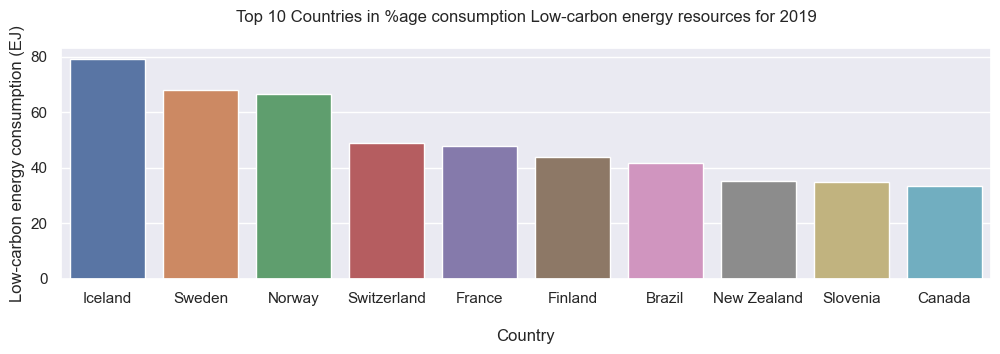

In [25]:
# Top Countries with Maximum Renewable Energy and Nuclear Energy Consumption
source = pct_sustainable.reset_index().sort_values( by = 'lowcarbon_consumption', ascending=False ).head(10)
sns.set()
plt.figure(figsize=(12,3))
g = sns.barplot(x='country', y= 'lowcarbon_consumption', data= source)
plt.xlabel("\nCountry")
plt.ylabel("Low-carbon energy consumption (EJ)")
plt.title("Top 10 Countries in %age consumption Low-carbon energy resources for 2019\n")
plt.show()

### Small Countries, Big Impact...

#### France
- France's present energy mix is a result of the French government deciding in 1974, just after the first oil shock, to rapidly expand the country's nuclear power capacity. France had substantial heavy engineering expertise but few known indigenous energy resources. Nuclear energy, with the fuel cost being a relatively small part of the overall cost, made good sense in minimising imports and achieving greater energy security. 
- France now claims a substantial level of energy independence and almost the lowest cost electricity in Europe. It also has an extremely low level of carbon dioxide emissions per capita, since over 80% of its electricity is nuclear or hydro.

<left>
<img src="France.png" width=400 height=400/>
</left>

#### Sweden
- Sweden started developing nuclear technology during the first oil crisis in 1973. They decided that two nuclear reactors should be decommissioned, in 1995 and 1996 respectively, so it was very important to develop alternatives quickly. But the plan to decommision the nuclear plants was soon withdrawn.
- Sweden has an **Electricity Certificate System** – a market-based support system for renewable electricity production. It aimed to increase the production of renewable electricity and make it more cost-efficient. Electricity retailers are required to buy a proportion of green electricity as part of their normal supply, while power producers receive certification for the renewable electricity they generate.  This is when wind energy production took off. 
- Over the last decade, wind power has become an increasing focus and provides around 20% of Sweden's electricity. It is the energy source that can be built at the speediest pace and at the lowest price.

<left>
<img src="Sweden.png" width=400 height=400/>
</left>

#### Iceland
- Until the early 1970s, the largest share of the country’s energy consumption was derived from imported fossil fuels. The drive behind this transition from non-renewable to renewable resources was that Iceland could not sustain oil price fluctuations occurring due to a number of crises affecting world energy markets. It required a stable and economically feasible domestic energy resource for its isolated location on the edge of the Arctic Circle.
- In 2015, the total energy consumption in Iceland was 18,798 GWh. Renewable energy provided almost 100% of energy production, with about 73% coming from hydropower and 27% from geothermal power. In 2009 Iceland built its biggest hydroelectric project to date, the Kárahnjúkar Hydropower Plant, a 690 MW hydroelectric plant, which was the reason behind the rapid increase in hydro consumption in 2009.

<left>
<img src="Iceland.png" width=400 height=400/>
</left>

#### Norway
- A country well known for its high mountain plateaus, abundant natural lakes and steep valleys and fjords, Norway's topography lends itself perfectly to hydropower development. 

<left>
<img src="Norway.png" width=400 height=400/>
</left>

#### Brazil
- Brazil is the third largest hydroelectricity producer in the world after China and Canada. However, experts state that Brazil’s hydroelectric potential has not yet been fully explored given that the country has the capacity to build several more hydroelectricity plants in its territory. Still, the current dependence on hydropower makes Brazil very vulnerable to power supply shortages in drought years, as was demonstrated during 2001-2002 when a drought triggered an energy crisis.
- Renewables compose almost 45% of Brazil’s primary energy demand, which makes their energy sector one of the least carbon-intensive in the world. Brazil’s national grid is made up of almost 80% from renewable sources. 

<left>
<img src="Brazil.png" width=400 height=400/>
</left>

### 5. Analyzing Low - Carbon Energy Consumption for the Year 2019, Top Consuming Countries

#### Top Consumers Globally (By Absolute Value)

In [26]:
# Drop 'World' Row Indexes
index_names = energy_consumption_df[energy_consumption_df['country'] == 'World'].index
year2019_df = energy_consumption_df.drop(index_names, inplace = True)

# Subsetting for Year 2019
year2019_df = energy_consumption_df[energy_consumption_df['year'] == 2019]
year2019_df.head()

,country,year,oil_consumption,gas_consumption,coal_consumption,solar_consumption,hydro_consumption,nuclear_consumption,wind_consumption,geo_biomass_other
54,Algeria,2019,244.927174,452.375362,5.815005,1.522874,0.375147,0.000000,0.024762,0.000000
109,Angola,2019,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
164,Argentina,2019,329.328038,474.906331,6.347707,1.980227,91.785463,20.903984,12.371104,5.936273
219,Australia,2019,595.199645,537.403270,495.308728,44.449891,35.394758,0.000000,48.346833,8.854807
274,Austria,2019,152.250656,89.004482,34.955992,3.346797,100.860941,0.000000,18.411855,11.852748


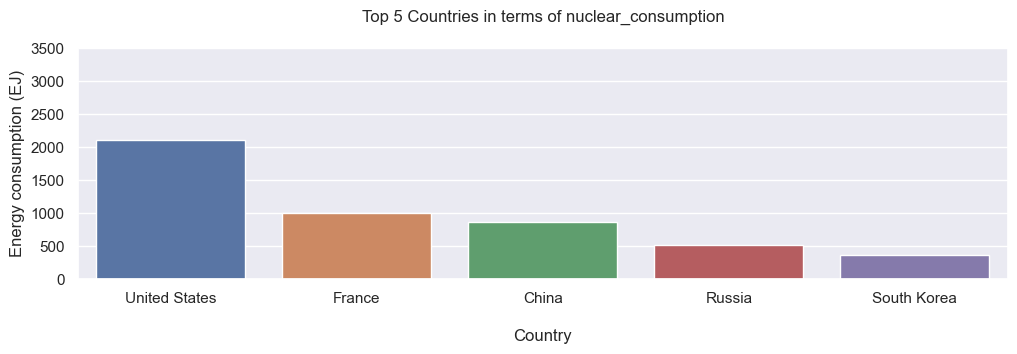

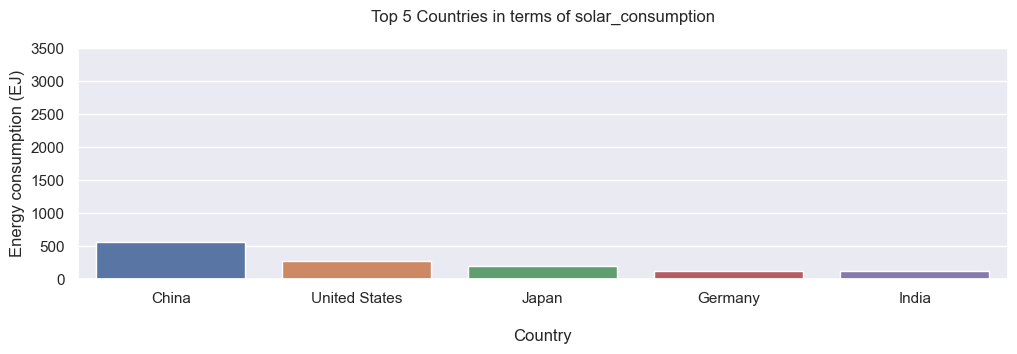

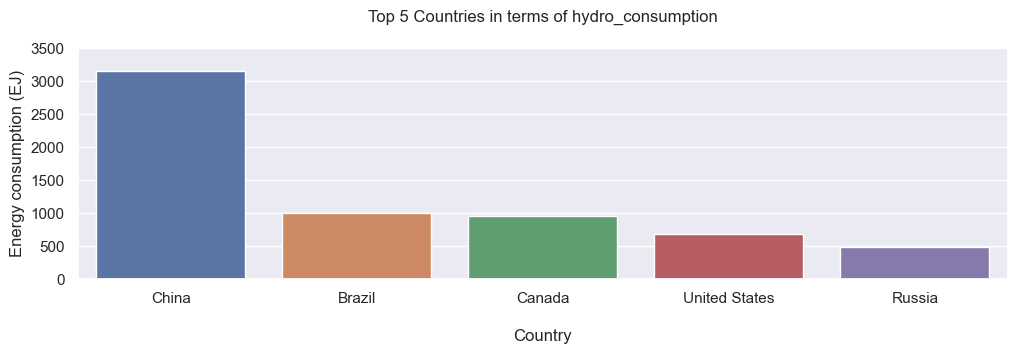

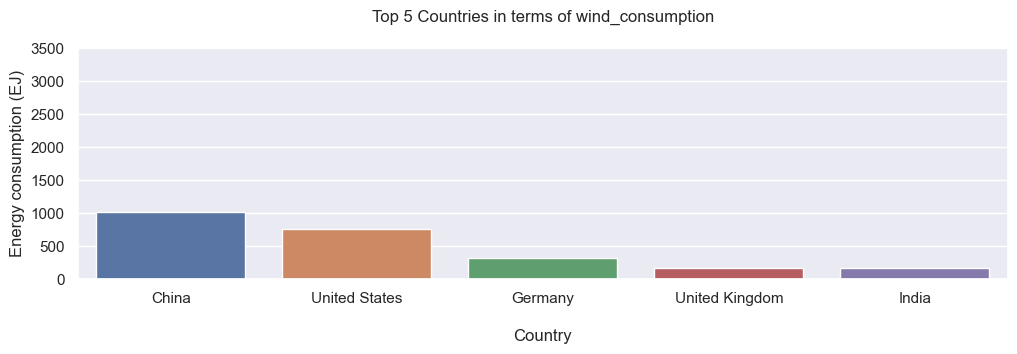

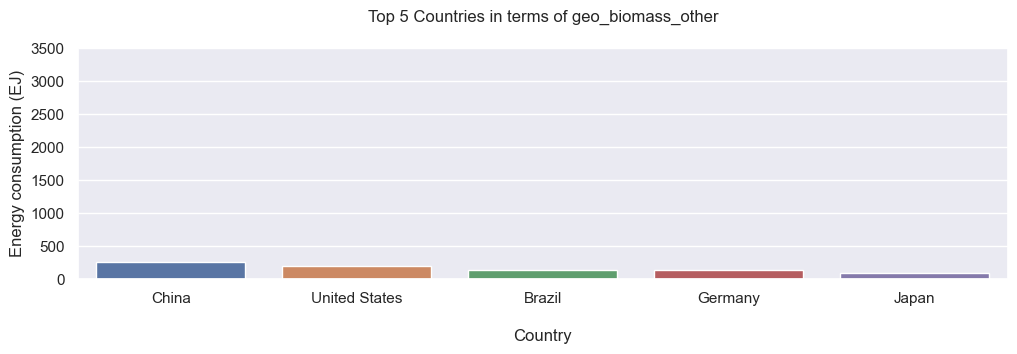

In [27]:
# Top Countries Consuming Renewable Energy Sources and Nuclear Energy Sources
renewable2019 = ['nuclear_consumption', 'solar_consumption', 'hydro_consumption', 'wind_consumption', 'geo_biomass_other']
# Plotting Top 5 Consumer Countries
for i in renewable2019:
    source = year2019_df.sort_values( by = i, ascending=False ).head(5)
    sns.set()
    plt.figure(figsize=(12,3))
    sns.barplot(x='country', y= i, data= source)
    plt.xlabel("\nCountry")
    plt.ylabel("Energy consumption (EJ)")
    plt.title("Top 5 Countries in terms of "+ i +"\n")
    plt.ylim(0,3500)
    plt.show()

From the above plot we can see that countries like China and USA consume the most amount of energy than the rest of the world, even in terms of renewable and nuclear resource. 

The gap of renewable power generation between China and rest of the world is too large. China produces much more renewable energy than other countries due to the fact that it respects the carbon tax and wants to reduce pollution rates. 

#### Percentage Wise Breakdown for All Resources, Countries which get the Highest Share of Energy from Low - Carbon Sources

In [28]:
year2019_df = year2019_df.drop(columns=['year'])
year2019_df.set_index('country', inplace=True)
year2019_df["total"] = year2019_df.sum(axis=1)
# Drop Rows where Total = 0
year2019_df = year2019_df[year2019_df['total']!= 0]
year2019_df.reset_index().head()

,country,oil_consumption,gas_consumption,coal_consumption,solar_consumption,hydro_consumption,nuclear_consumption,wind_consumption,geo_biomass_other,total
0,Algeria,244.927174,452.375362,5.815005,1.522874,0.375147,0.000000,0.024762,0.000000,705.040324
1,Argentina,329.328038,474.906331,6.347707,1.980227,91.785463,20.903984,12.371104,5.936273,943.559127
2,Australia,595.199645,537.403270,495.308728,44.449891,35.394758,0.000000,48.346833,8.854807,1764.957931
3,Austria,152.250656,89.004482,34.955992,3.346797,100.860941,0.000000,18.411855,11.852748,410.683471
4,Azerbaijan,59.722023,117.892451,0.014333,0.108458,3.874291,0.000000,0.333409,0.200821,182.145787


In [29]:
pct2019 = year2019_df.apply(lambda x: (x[renewable2019]/x['total'])*100, axis = 1)
pct2019.reset_index().head(5)

,country,nuclear_consumption,solar_consumption,hydro_consumption,wind_consumption,geo_biomass_other
0,Algeria,0.00000,0.215998,0.053209,0.003512,0.000000
1,Argentina,2.21544,0.209868,9.727579,1.311111,0.629136
2,Australia,0.00000,2.518467,2.005416,2.739263,0.501701
3,Austria,0.00000,0.814933,24.559289,4.483223,2.886103
4,Azerbaijan,0.00000,0.059545,2.127028,0.183045,0.110253


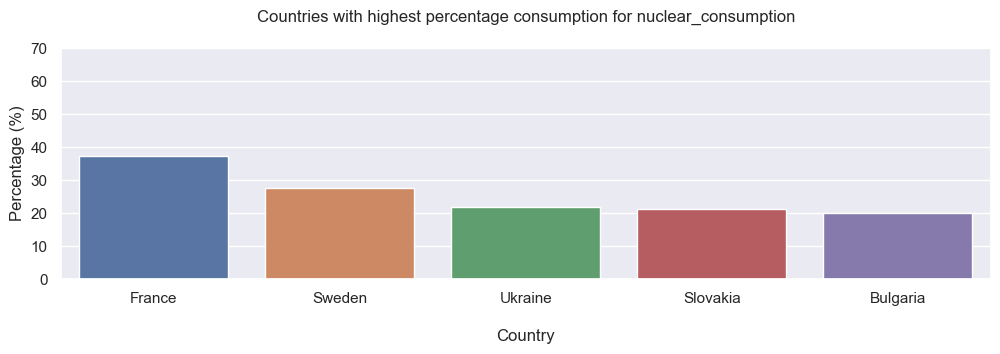

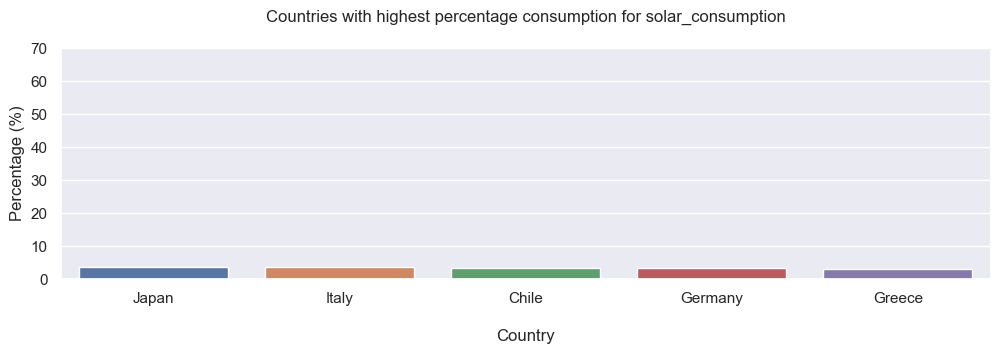

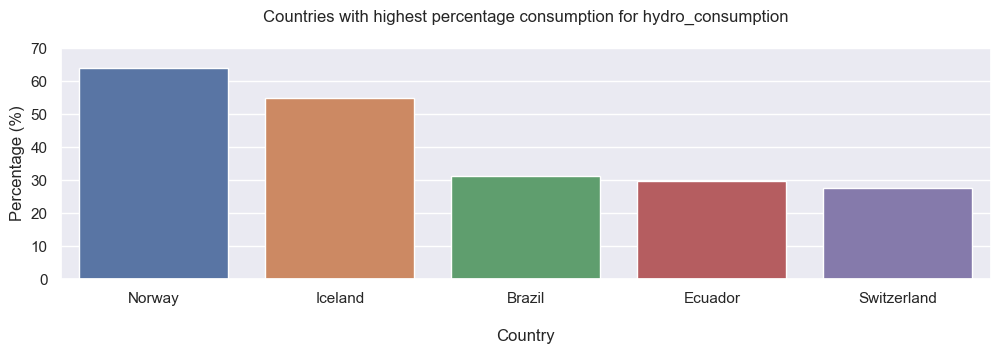

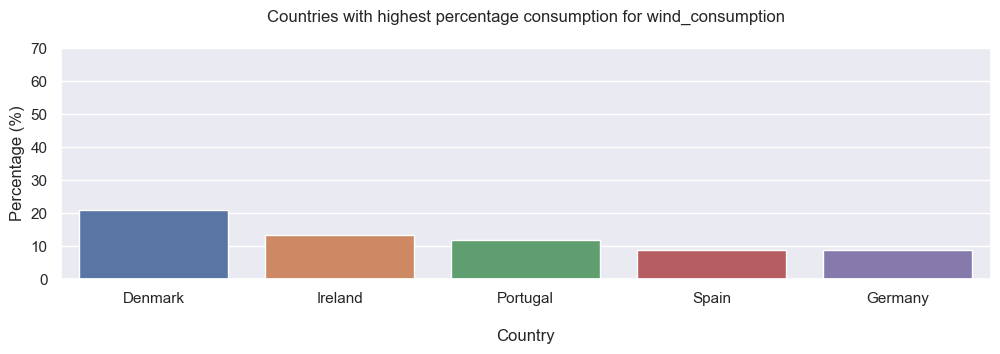

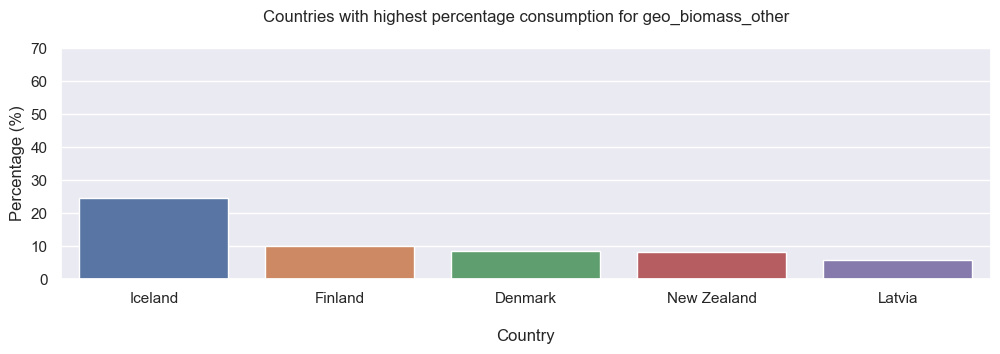

In [30]:
# Top Countries with Maximum Renewable Energy and Nuclear Energy Consumption

# Plotting Top 5 Consumer Countries Based on Percentage
for i in renewable2019:
    source = pct2019.reset_index().sort_values( by = i, ascending=False ).head(5)
    sns.set()
    plt.figure(figsize=(12,3))
    sns.barplot(x='country', y= i, data= source)
    plt.xlabel("\nCountry")
    plt.ylabel("Percentage (%)")
    plt.title("Countries with highest percentage consumption for "+ i +"\n")
    plt.ylim(0,70)
    plt.show()

### Nuclear Energy CountyWise Consumption

In [31]:
nuclear_df = energy_consumption_df[['country','year','nuclear_consumption']]

In [32]:
# Nuclear Energy Analysis of Top 3 Countries
country_top_nuclear = nuclear_df.pivot(index = 'country', columns ='year')
country_top_nuclear = country_top_nuclear.fillna(0)
country_top_nuclear = country_top_nuclear.loc[["France", "Sweden", "Ukraine"]]
country_top_nuclear.head()

nuclear_consumption                                           \
year                   1965      1966      1967      1968       1969   
country                                                                
France             2.491669  3.875003  5.766671  8.569451  10.000008   
Sweden             0.050000  0.125000  0.138889  0.063889   0.169445   
Ukraine            0.000000  0.000000  0.000000  0.000000   0.000000   

                                                               ...  \
year          1970      1971       1972       1973       1974  ...   
country                                                        ...   
France   15.863902  25.91391  40.530588  40.975033  40.861144  ...   
Sweden    0.155556   0.25000   4.069448   5.863894   5.705560  ...   
Ukraine   0.000000   0.00000   0.000000   0.000000   0.000000  ...   

                                                                          \
year            2010         2011         2012         2013         2014   
country                                                                    
France   1117.310250  1146.433234  1095.743604  1084.736561  1110.800739   
Sweden    150.517912   156.718875   164.943920   170.146070   165.106270   
Ukraine   232.451720   233.873800   232.172277   213.035261   224.942500   

                                                                        
year            2015         2016        2017         2018        2019  
country                                                                 
France   1106.589576  1013.952734  995.890580  1028.564276  989.089623  
Sweden    142.547138   158.686074  164.240131   170.370458  165.955401  
Ukraine   221.676636   203.572648  213.940671   209.761527  205.532328  

[3 rows x 55 columns]

In [33]:
country_top_nuclear = country_top_nuclear.unstack().reset_index(name='nuclear_consumption')
country_top_nuclear.drop(columns = 'level_0').head(3)

,year,country,nuclear_consumption
0,1965,France,2.491669
1,1965,Sweden,0.050000
2,1965,Ukraine,0.000000


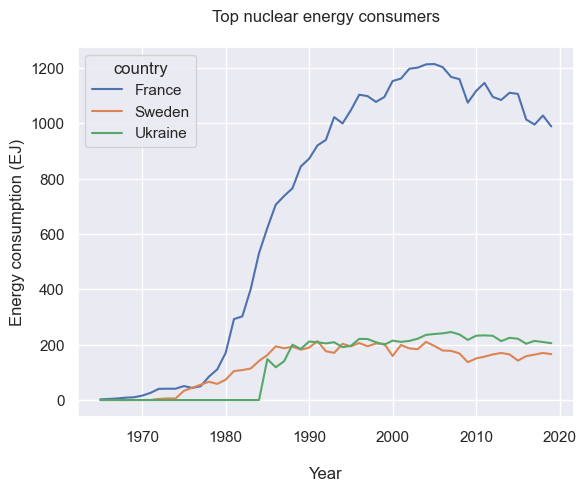

In [34]:
sns.lineplot(x='year', y='nuclear_consumption', hue= 'country', data = country_top_nuclear)
plt.xlabel("\nYear")
plt.ylabel("Energy consumption (EJ)")
plt.title("Top nuclear energy consumers\n")
plt.show()

### Hydro Energy Country - Wise Consumption

In [35]:
# Hydro Energy Analysis of Top 3 Countries
hydro_df = energy_consumption_df[['country','year','hydro_consumption']]

In [36]:
country_top_hydro = hydro_df.pivot(index = 'country', columns ='year')
country_top_hydro = country_top_hydro.fillna(0)
country_top_hydro = country_top_hydro.loc[["Norway", "Iceland", "Brazil"]]
country_top_hydro.head()

hydro_consumption                                                  \
year                 1965        1966        1967        1968        1969   
country                                                                     
Norway         137.366777  135.400108  148.058452  167.236245  159.364016   
Iceland          1.779724    1.733057    1.845835    1.908057    2.389169   
Brazil          70.875057   77.516729   81.080620   84.861179   90.811184   

                                                                     ...  \
year           1970        1971        1972        1973        1974  ...   
country                                                              ...   
Norway   160.577906  175.680696  187.269594  202.408495  212.769615  ...   
Iceland    3.924725    4.276670    4.729448    6.058338    6.272783  ...   
Brazil   110.558422  119.997318  140.780668  160.805684  182.441813  ...   

                                                                         \
year            2010         2011         2012         2013        2014   
country                                                                   
Norway    304.409753   311.729975   365.083019   328.105383  344.680366   
Iceland    32.832142    32.411041    31.775936    32.932005   32.760693   
Brazil   1051.523360  1110.009979  1069.821611  1001.034572  950.369627   

                                                                     
year           2015        2016        2017        2018        2019  
country                                                              
Norway   347.341647  358.152062  354.887784  345.446410  310.162432  
Iceland   34.862094   33.873272   35.146834   34.330076   33.325040  
Brazil   910.064380  957.912899  927.266883  966.741751  988.746892  

[3 rows x 55 columns]

In [37]:
country_top_hydro = country_top_hydro.unstack().reset_index(name='hydro_consumption')
country_top_hydro.drop(columns = 'level_0').head(3)

,year,country,hydro_consumption
0,1965,Norway,137.366777
1,1965,Iceland,1.779724
2,1965,Brazil,70.875057


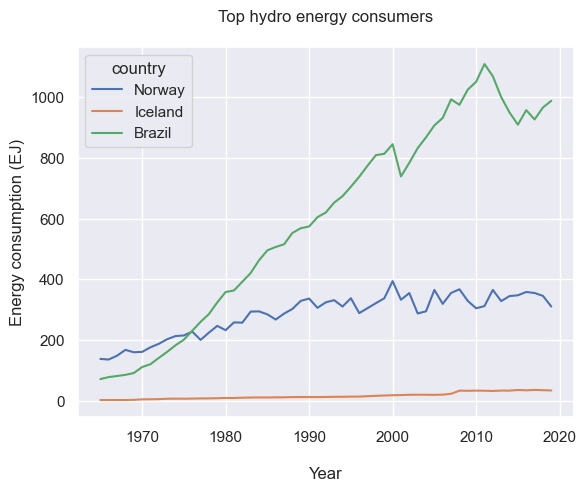

In [38]:
sns.lineplot(x='year', y='hydro_consumption', hue= 'country', data = country_top_hydro)
plt.xlabel("\nYear")
plt.ylabel("Energy consumption (EJ)")
plt.title("Top hydro energy consumers\n")
plt.show()

#### Solar Energy CountyWise Consumption

In [39]:
# Solar Energy Analysis of Top 3 Countries
solar_df = energy_consumption_df[['country','year','solar_consumption']]

In [40]:
country_top_solar = solar_df.pivot(index = 'country', columns ='year')
country_top_solar = country_top_solar.fillna(0)
country_top_solar = country_top_solar.loc[["Japan", "Italy", "Chile"]]
country_top_solar.head()

solar_consumption                                               ...  \
year                 1965 1966 1967 1968 1969 1970 1971 1972 1973 1974  ...   
country                                                                 ...   
Japan                 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   
Italy                 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   
Chile                 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   

                                                                           \
year          2010       2011       2012       2013       2014       2015   
country                                                                     
Japan    10.380904  14.095370  18.988250  33.049618  59.928016  87.378481   
Italy     4.968854  27.976684  48.583206  55.272062  56.767830  58.038350   
Chile     0.000000   0.000000   0.000877   0.017298   1.167384   3.440733   

                                                         
year           2016        2017        2018        2019  
country                                                  
Japan    108.955232  135.604333  164.173230  186.396082  
Italy     55.587781   60.944299   56.303349   60.236490  
Chile      6.413390    9.739879   12.721977   15.600737  

[3 rows x 55 columns]

In [41]:
country_top_solar = country_top_solar.unstack().reset_index(name='solar_consumption')
country_top_solar.drop(columns = 'level_0').head(3)

,year,country,solar_consumption
0,1965,Japan,0.0
1,1965,Italy,0.0
2,1965,Chile,0.0


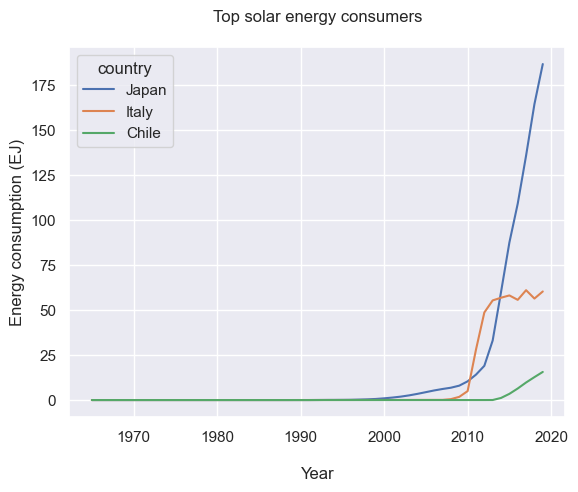

In [42]:
sns.lineplot(x='year', y='solar_consumption', hue= 'country', data = country_top_solar)
plt.xlabel("\nYear")
plt.ylabel("Energy consumption (EJ)")
plt.title("Top solar energy consumers\n")
plt.show()

#### Wind Energy CountryWise Consumption

In [43]:
# Wind Energy Analysis of Top 3 Countries
wind_df = energy_consumption_df[['country','year','wind_consumption']]

In [44]:
country_top_wind = solar_df.pivot(index = 'country', columns ='year')
country_top_wind = country_top_wind.fillna(0)
country_top_wind = country_top_wind.loc[["Denmark", "Ireland", "Portugal"]]
country_top_wind.head()

solar_consumption                                               ...  \
year                  1965 1966 1967 1968 1969 1970 1971 1972 1973 1974  ...   
country                                                                  ...   
Denmark                0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   
Ireland                0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   
Portugal               0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   

                                                                      \
year          2010      2011      2012      2013      2014      2015   
country                                                                
Denmark   0.016064  0.039210  0.267521  1.325032  1.515538  1.528638   
Ireland   0.001241  0.001405  0.001664  0.001791  0.002408  0.004090   
Portugal  0.560583  0.730793  1.012274  1.226715  1.596466  2.014084   

                                                  
year          2016      2017      2018      2019  
country                                           
Denmark   1.870456  1.878717  2.368502  2.385263  
Ireland   0.013436  0.027003  0.041397  0.061622  
Portugal  2.067161  2.480002  2.497809  3.157179  

[3 rows x 55 columns]

In [45]:
country_top_wind = country_top_wind.unstack().reset_index(name='wind_consumption')
country_top_wind.drop(columns = 'level_0').head(3)

,year,country,wind_consumption
0,1965,Denmark,0.0
1,1965,Ireland,0.0
2,1965,Portugal,0.0


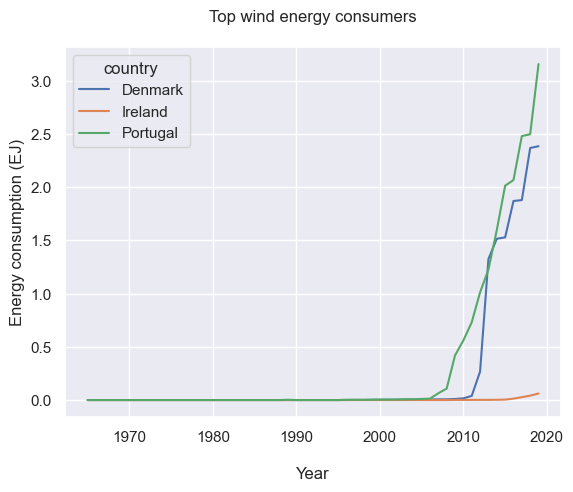

In [46]:
sns.lineplot(x='year', y='wind_consumption', hue= 'country', data = country_top_wind)
plt.xlabel("\nYear")
plt.ylabel("Energy consumption (EJ)")
plt.title("Top wind energy consumers\n")
plt.show()

#### Analyzing Past Trend for Low - Carbon and Nuclear Energy over 55 years

In [47]:
df5 = world_df.copy()
df5 = df5.groupby(['year'])['solar_consumption', 'hydro_consumption', 'nuclear_consumption', 'wind_consumption', 'geo_biomass_other'].apply(lambda x : x.sum())
df5["renewable_consumption"] = df5.sum(axis=1)
df5 = df5.drop(columns = ['solar_consumption', 'hydro_consumption', 'wind_consumption', 'geo_biomass_other'])
df5.head()

C:\Users\DELL\AppData\Local\Temp\ipykernel_5216\3613967711.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df5 = df5.groupby(['year'])['solar_consumption', 'hydro_consumption', 'nuclear_consumption', 'wind_consumption', 'geo_biomass_other'].apply(lambda x : x.sum())


,nuclear_consumption,renewable_consumption
year,,
1965,141.887470,5278.033956
1966,191.262877,5662.861006
1967,227.705816,5816.602432
1968,289.467810,6179.291394
1969,343.099783,6570.613449


Text(0, 0.5, 'Energy Consumption (EJ)')

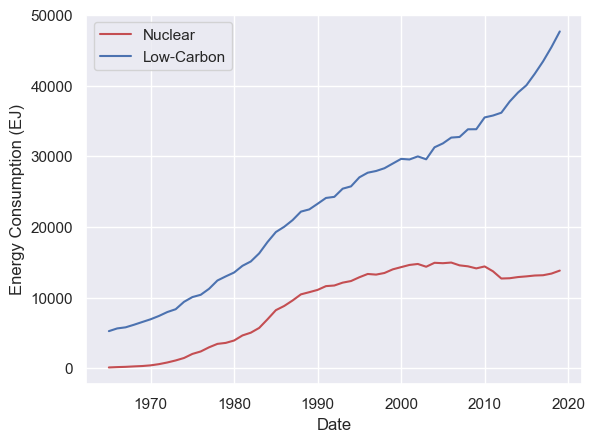

In [48]:
ax1 = df5.reset_index().plot(kind='line', x='year', y='nuclear_consumption', color='r', label='Nuclear')    
ax2 = df5.reset_index().plot(kind='line', x='year', y='renewable_consumption', color='b', label='Low-Carbon', ax=ax1)    
plt.xlabel("Date")
plt.ylabel("Energy Consumption (EJ)")

### 6. Prediction

#### Polynomial Regression

In [49]:
# Creating a Copy of World_df 
wdf = world_df.copy()
wdf['renewable_consumption'] = wdf['hydro_consumption']+wdf['solar_consumption']+wdf['wind_consumption']+wdf['geo_biomass_other']
wdf.reset_index(inplace=True)
wdf.head()

,year,solar_consumption,hydro_consumption,nuclear_consumption,wind_consumption,geo_biomass_other,renewable_consumption
0,1965,0.0,5036.228450,141.887470,0.0,99.918036,5136.146486
1,1966,0.0,5361.564669,191.262877,0.0,110.033460,5471.598129
2,1967,0.0,5477.860024,227.705816,0.0,111.036593,5588.896617
3,1968,0.0,5766.934346,289.467810,0.0,122.889238,5889.823584
4,1969,0.0,6098.302649,343.099783,0.0,129.211017,6227.513666


#### Renewable Resource Demand in the Coming 5 Years

In [50]:
# Features Year and Renewable Energy Resources Combined 
YEARS =  np.array(list(wdf['year'])).reshape(-1, 1)
RENEW_ENG = np.array(list(wdf['renewable_consumption'])) 

Mean Squared Error: 136029.8989837074
R² Score: -163.82787638658638


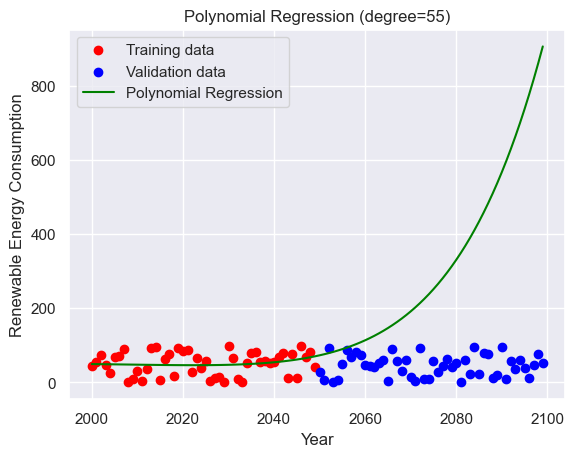

In [51]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import pandas as pd

# Sample Data Creation (Remove this part if your DataFrame is Already Defined)
data = {
    'year': [2000 + i for i in range(100)],
    'renewable_consumption': np.random.rand(100) * 100  # Random Data for Illustration
}
wdf = pd.DataFrame(data)

# Extracting the Features and Reshaping
YEARS = np.array(wdf['year']).reshape(-1, 1)
RENEW_ENG = np.array(wdf['renewable_consumption'])

# Splitting the Data into Training and Validation Sets
X_train = YEARS[:50]
y_train = RENEW_ENG[:50]
X_val = YEARS[50:]
y_val = RENEW_ENG[50:]

# Fitting Polynomial Regression to the Dataset
degree = 55
poly = PolynomialFeatures(degree=degree)
X_poly = poly.fit_transform(X_train)

lin2 = LinearRegression()
lin2.fit(X_poly, y_train)

# Predicting on the Validation Set
X_val_poly = poly.transform(X_val)
y_pred = lin2.predict(X_val_poly)

# Evaluating the Model
mse = mean_squared_error(y_val, y_pred)
r2 = r2_score(y_val, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")

# Optional: Plotting the Results (Requires matplotlib)
import matplotlib.pyplot as plt

plt.scatter(X_train, y_train, color='red', label='Training data')
plt.scatter(X_val, y_val, color='blue', label='Validation data')
plt.plot(YEARS, lin2.predict(poly.transform(YEARS)), color='green', label='Polynomial Regression')
plt.xlabel('Year')
plt.ylabel('Renewable Energy Consumption')
plt.title(f'Polynomial Regression (degree={degree})')
plt.legend()
plt.show()

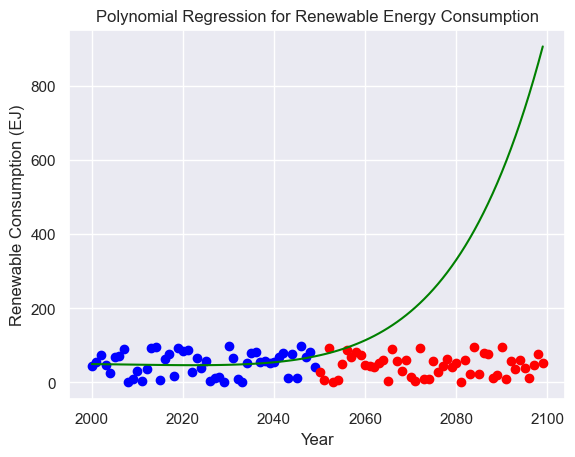

In [52]:
# Visualising the Polynomial Regression Training Results
# Train
plt.scatter(X_train, y_train, color = 'blue')
# Test
plt.scatter(X_val, y_val, color = 'red')
plt.plot(YEARS, lin2.predict(poly.fit_transform(YEARS)), color = 'green')
plt.title('Polynomial Regression for Renewable Energy Consumption')
plt.xlabel('Year')
plt.ylabel('Renewable Consumption (EJ)')
 
plt.show()

In [53]:
# Fitting Polynomial Regression to the Dataset
degree = 55
poly = PolynomialFeatures(degree=degree)
X_poly_train = poly.fit_transform(X_train)

lin2 = LinearRegression()
lin2.fit(X_poly_train, y_train)

# Transforming the Validation Set
X_poly_val = poly.transform(X_val)

# Predicting on the Validation Set
y_pred = lin2.predict(X_poly_val)

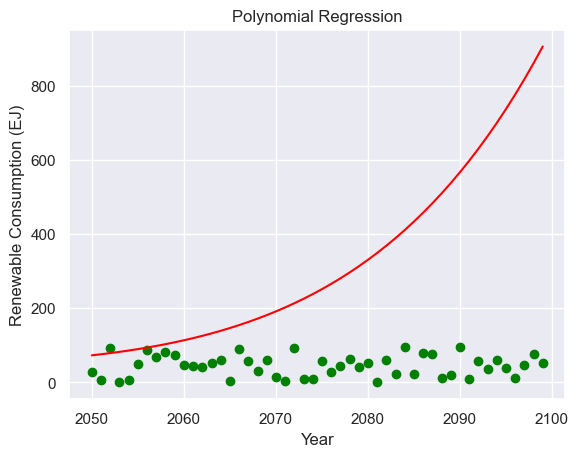

In [54]:
# Visualising the Polynomial Regression Validation Results
plt.scatter(X_val, y_val, color = 'green')
 
plt.plot(X_val, y_pred, color = 'red')
plt.title('Polynomial Regression')
plt.xlabel('Year')
plt.ylabel('Renewable Consumption (EJ)')
 
plt.show()

In [55]:
# Evaluating RMSE Score
rmse = np.sqrt(mean_squared_error(y_val,y_pred))
# Evaluating r2 Score
r2 = r2_score(y_val,y_pred)
print(rmse)
print(r2)

368.8223135653636
-163.82787638658638


Our R2 score is close to 1, but RMSE score shows a lot of deviation in the predicted values in Exajoules. We see an overfitting here. It also  depends on the fact that we only have data for the past 55 years. 

#### Time Series ARIMA Model to Predict the Resource - Wise Global Energy Consumption

Plotting the hydro_consumption, nuclear_consumption, wind_consumption, solar_consumption and geo_biomass_other yearwise and comparing the trends.

In [56]:
print(world_consumption_df.columns)

Index(['country', 'oil_consumption', 'gas_consumption', 'coal_consumption',
       'solar_consumption', 'hydro_consumption', 'nuclear_consumption',
       'wind_consumption', 'geo_biomass_other'],
      dtype='object')


In [57]:
print(world_consumption_df.columns)

Index(['country', 'oil_consumption', 'gas_consumption', 'coal_consumption',
       'solar_consumption', 'hydro_consumption', 'nuclear_consumption',
       'wind_consumption', 'geo_biomass_other'],
      dtype='object')


Columns in DataFrame: Index(['country', 'oil_consumption', 'gas_consumption', 'coal_consumption',
       'solar_consumption', 'hydro_consumption', 'nuclear_consumption',
       'wind_consumption', 'geo_biomass_other'],
      dtype='object')


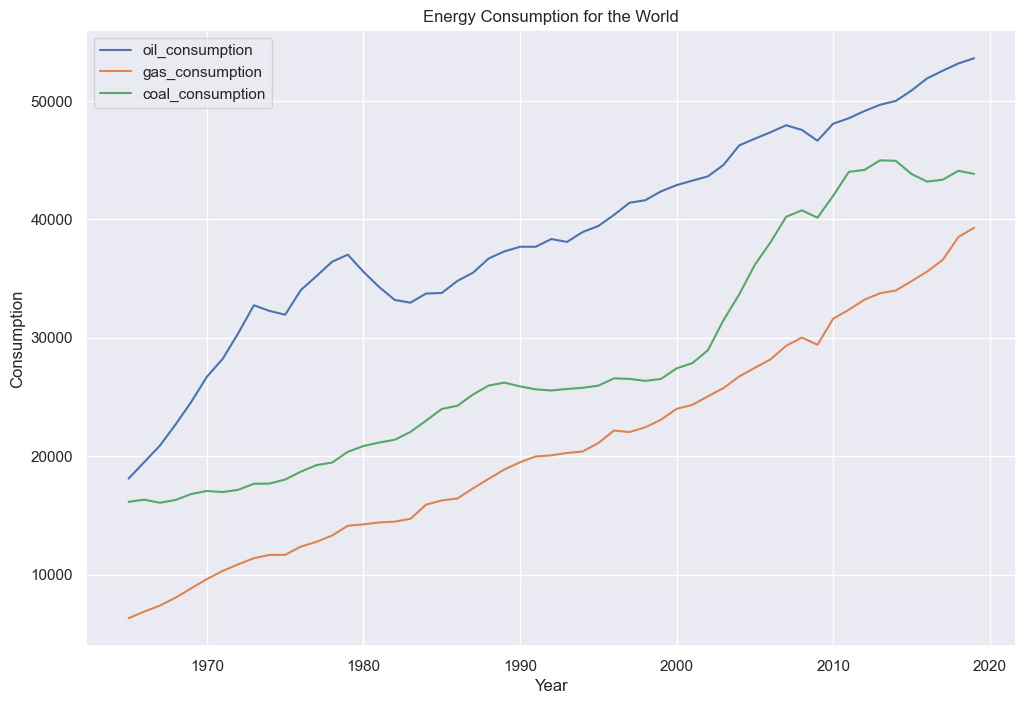

In [58]:
import matplotlib.pyplot as plt

# List of Energy Sources
energy_sources = ['oil_consumption', 'gas_consumption', 'coal_consumption']

# Print the Columns of the DataFrame to Check for Discrepancies
print("Columns in DataFrame:", world_consumption_df.columns)

# Initialize the Plot
plt.figure(figsize=(12, 8))

# Loop through Each Energy Source
for energy in energy_sources:
    if energy in world_consumption_df.columns:
        # Plot the Average Consumption of the Energy Source Per Year
        plt.plot(world_consumption_df.groupby('year')[energy].mean(), label=energy)
    else:
        print(f"Warning: Column '{energy}' not found in the DataFrame")

# Add Title and Labels
plt.title('Energy Consumption for the World')
plt.xlabel('Year')
plt.ylabel('Consumption')

# Add a Legend
plt.legend()

# Show the Plot
plt.show()

In [59]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 10, 6

We check for stationarity using rolling mean and rolling standard deviation. If both remain constant over time, then the series is said to be stationary

Columns in DataFrame: Index(['country', 'oil_consumption', 'gas_consumption', 'coal_consumption',
       'solar_consumption', 'hydro_consumption', 'nuclear_consumption',
       'wind_consumption', 'geo_biomass_other'],
      dtype='object')


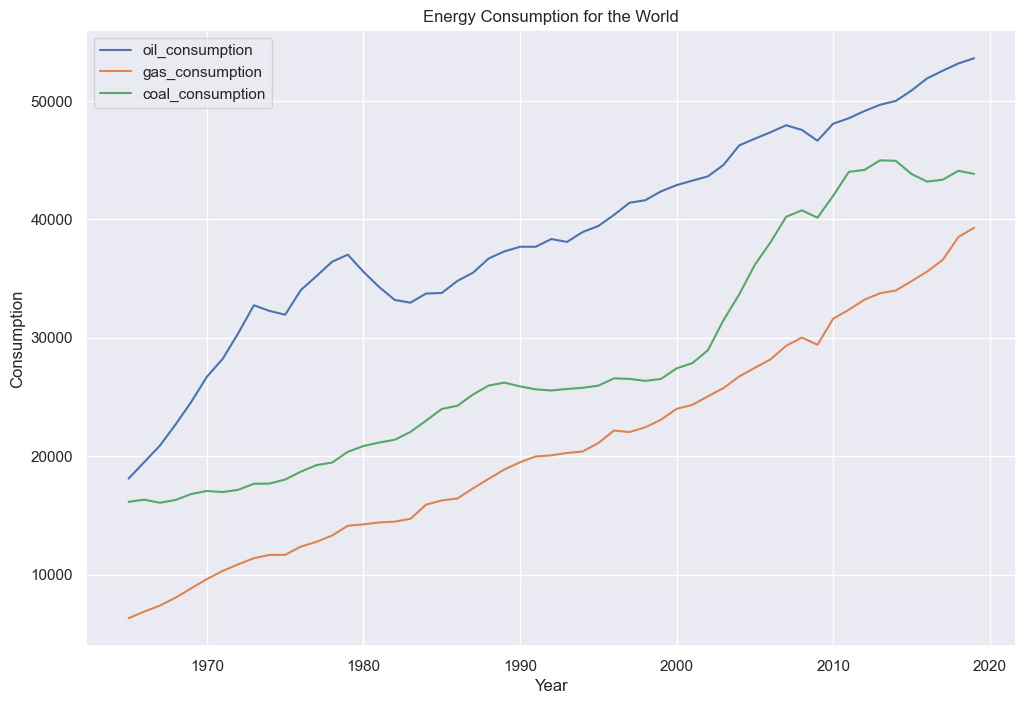

In [60]:
import matplotlib.pyplot as plt

# Define the List of Energy Sources
renewable_energy = ['oil_consumption', 'gas_consumption', 'coal_consumption']

# Print the Columns of the DataFrame to Check for Discrepancies
print("Columns in DataFrame:", world_consumption_df.columns)

# Initialize the Plot
plt.figure(figsize=(12, 8))

# Loop through Each Renewable Energy Source
for energy in renewable_energy:
    if energy in world_consumption_df.columns:
        # Plot the Average Consumption of the Energy Source Per Year
        plt.plot(world_consumption_df.groupby('year')[energy].mean(), label=energy)
    else:
        print(f"Warning: Column '{energy}' not found in the DataFrame")

# Add Title and Labels
plt.title('Energy Consumption for the World')
plt.xlabel('Year')
plt.ylabel('Consumption')

# Add a Legend
plt.legend()

# Show the Plot
plt.show()

Here we can see none of the series are stationary as both rolling mean and rolling standard keep increasing over time. We'll also check the same by taking the Dicky Fuller Test.

In [61]:
from statsmodels.tsa.stattools import adfuller
import pandas as pd

# Sample Data Creation (Remove this part if your DataFrame is already defined)
data = {
    'year': [2000 + i // 5 for i in range(100)],
    'renewable_energy_1': np.random.rand(100) * 100,  # Random Data for Illustration
    'renewable_energy_2': np.random.rand(100) * 100
}
world_consumption_df = pd.DataFrame(data)

renewable_energy = ['renewable_energy_1', 'renewable_energy_2']

for energy in renewable_energy:
    print("\n{}".format(energy))
    adfuller_result = adfuller(world_consumption_df.groupby('year')[energy].mean())
    print('\nADF Statistic: {}\np-value: {}\n'.format(adfuller_result[0], adfuller_result[1]))
    print('Critical Values:')
    for key, value in adfuller_result[4].items():
        print('\t{}: {}'.format(key, value))


renewable_energy_1

ADF Statistic: -5.210158686342868
p-value: 8.381787270816514e-06

Critical Values:
	1%: -4.137829282407408
	5%: -3.1549724074074077
	10%: -2.7144769444444443

renewable_energy_2

ADF Statistic: -1.1140848527364355
p-value: 0.7094224692584332

Critical Values:
	1%: -4.223238279489106
	5%: -3.189368925619835
	10%: -2.729839421487603


We see here even the p-values are much more than the threshold of 0.05. So the dicky fuller test also confirms the series aren't stationary. 

We apply a log function to the dataset to reduce the rate of increase of the series.

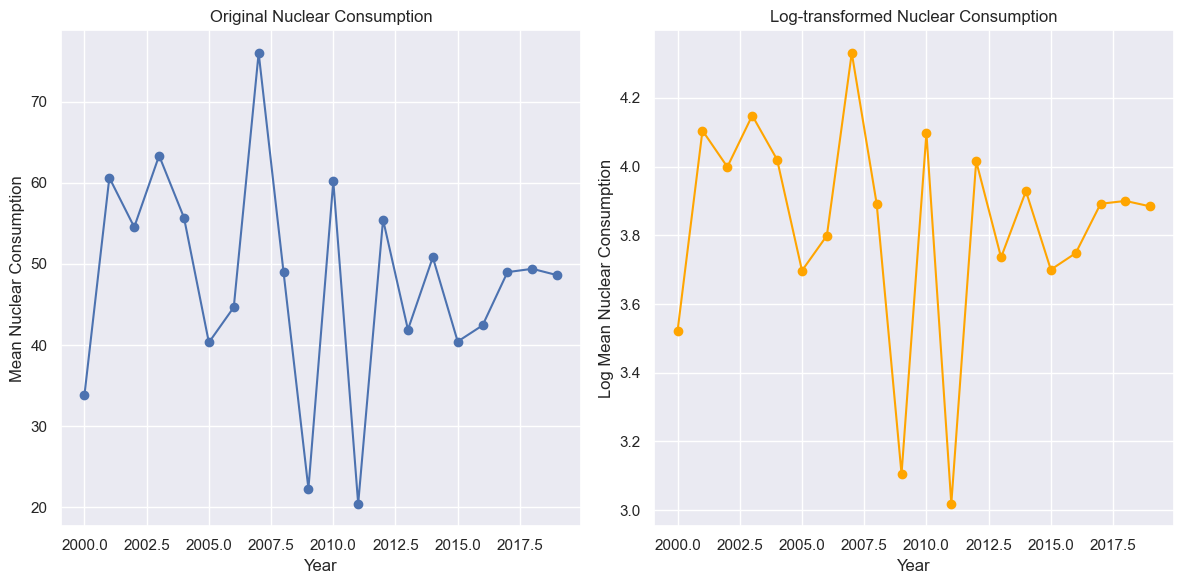

In [62]:
# Sample data creation (remove this part if your DataFrame is already defined)
data = {
    'year': [2000 + i // 5 for i in range(100)],
    'nuclear_consumption': np.random.rand(100) * 100  # Random data for illustration
}
world_consumption_df = pd.DataFrame(data)

# Estimating trend
orig_df = world_consumption_df.groupby('year')['nuclear_consumption'].mean()
world_consumption_df_logScale = np.log(orig_df)

# Plotting
plt.figure(figsize=(12, 6))

# Original data
plt.subplot(1, 2, 1)
plt.plot(orig_df, marker='o')
plt.title('Original Nuclear Consumption')
plt.xlabel('Year')
plt.ylabel('Mean Nuclear Consumption')

# Log-transformed data
plt.subplot(1, 2, 2)
plt.plot(world_consumption_df_logScale, marker='o', color='orange')
plt.title('Log-transformed Nuclear Consumption')
plt.xlabel('Year')
plt.ylabel('Log Mean Nuclear Consumption')

plt.tight_layout()
plt.show()

We now define a forecasting function which takes in as dataframe, list of energies and the number of years to predict for as input

In [63]:
def get_forecast(data, energy_list, number_of_years_to_predict, plot):
    # Data  = data.set_index(['year'])
    energy_results_ARIMA = {}
    for energy in energy_list:
        energy_results_ARIMA[energy] = {}
        # Energy = 'oil_consumption'
        orig_df = data.groupby('year')[energy].mean()
        orig_df = orig_df[orig_df!=0]
        # Print(orig_df)
        start_year_str = str(orig_df.index[0])
        end_year_str = str(orig_df.index[-1]+1)
        orig_df.index = pd.date_range(start=start_year_str, end=end_year_str, freq='A')
        data_logScale = np.log(orig_df)
        model = ARIMA(data_logScale, order=(2,1,0))

        results_ARIMA = model.fit(disp=-1)
        # plt.plot(energy_consumption_df_top_5_logScale)
        # plt.plot(results_ARIMA.fittedvalues, color='red')
        # plt.title('Forecasting {} Consumption'.format(energy))
        energy_results_ARIMA[energy]['year_cnt'] = len(orig_df)
        if(plot==True):
            results_ARIMA.plot_predict(1,len(orig_df)-1+number_of_years_to_predict)
            plt.show()
        energy_results_ARIMA[energy]['model'] = results_ARIMA
    return energy_results_ARIMA

In [64]:
# Total World Consumption Energy Wise
def get_energy_consumption_estimation(num_years_to_predict, energy_results_ARIMA):
    tot_cons_energy_wise = {}
    for energy in energy_results_ARIMA.keys():
        year_cnt = energy_results_ARIMA[energy]['year_cnt']
        yearwise_energy_consp_log = energy_results_ARIMA[energy]['model'].forecast(year_cnt+num_years_to_predict)
        yearwise_energy_consp_exp = np.exp(yearwise_energy_consp_log[0])
        tot__predicted_energy_consp = sum(yearwise_energy_consp_exp[-num_years_to_predict:])
        print("Total World {} estimation: {} Exajoule".format(energy, tot__predicted_energy_consp))
        tot_cons_energy_wise[energy] = tot__predicted_energy_consp
    return tot_cons_energy_wise

### Prediction for Global Energy Consumption for Fossil Fuels and Low - Carbon Resources using the ARIMA Time Series Model

We now find the estimated numerical values of low carbon energies consumption in the next 10 years

In [65]:
import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

In [66]:
from statsmodels.tsa.arima.model import ARIMA

def get_forecast(df, energy_types, number_of_years_to_predict=10, plot=True):
    forecast_results = {}
    
    for energy in energy_types:
        # Group by Year and Calculate the Mean
        ts = df.groupby('year')[energy].mean()
        
        # Fit ARIMA Model
        model = ARIMA(ts, order=(5, 1, 0))  # (p,d,q) Order can be Adjusted based on the Data
        model_fit = model.fit()
        
        # Forecast
        forecast = model_fit.forecast(steps=number_of_years_to_predict)
        
        # Store Results
        forecast_results[energy] = forecast
        
        # Plotting
        if plot:
            plt.figure(figsize=(10, 6))
            plt.plot(ts, label='Observed')
            plt.plot(range(ts.index[-1]+1, ts.index[-1]+1+number_of_years_to_predict), forecast, label='Forecast', color='orange')
            plt.title(f'Forecast of {energy} for the next {number_of_years_to_predict} years')
            plt.xlabel('Year')
            plt.ylabel('Consumption')
            plt.legend()
            plt.show()
    
    return forecast_results

In [67]:
def get_energy_consumption_estimation(number_of_years, forecast_results):
    total_consumption = {}
    
    for energy, forecast in forecast_results.items():
        total_consumption[energy] = forecast.sum()
    
    return total_consumption

C:\Users\DELL\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\DELL\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\DELL\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\DELL\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\DELL\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, ca

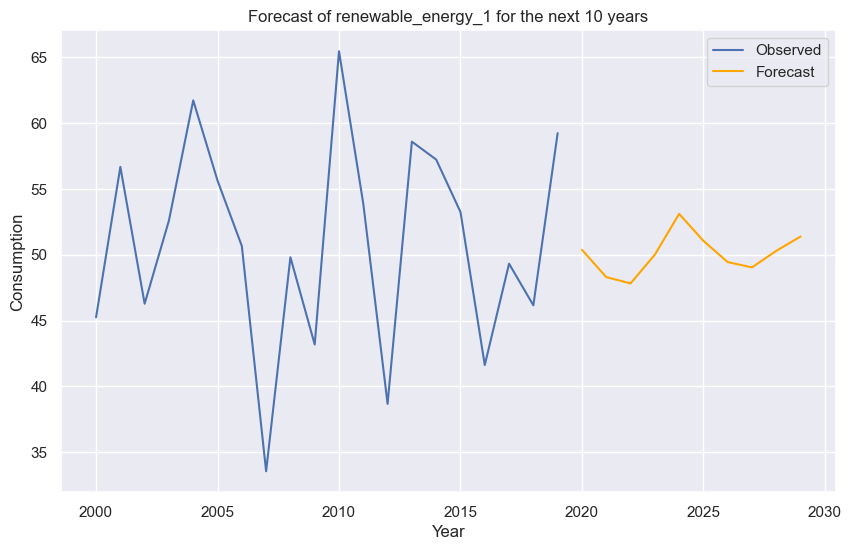

C:\Users\DELL\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\DELL\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\DELL\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\DELL\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\DELL\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, ca

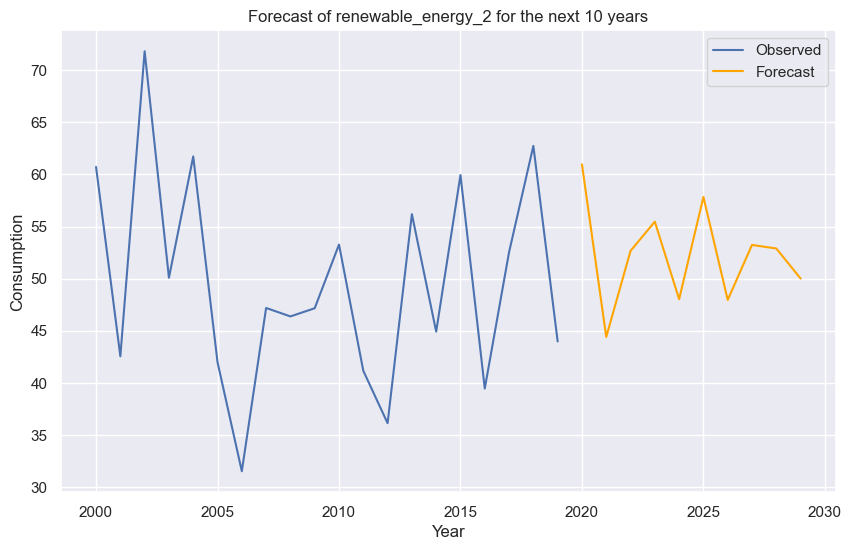

{'renewable_energy_1': 500.8258445459927, 'renewable_energy_2': 523.4701581954008}


In [68]:
# Sample Data Creation (Remove this Part if your DataFrame is Already Defined)
data = {
    'year': [2000 + i // 5 for i in range(100)],
    'renewable_energy_1': np.random.rand(100) * 100,  # Random Data for Illustration
    'renewable_energy_2': np.random.rand(100) * 100
}
world_consumption_df = pd.DataFrame(data)

# Define the Types of Renewable Energy
renewable_energy = ['renewable_energy_1', 'renewable_energy_2']

# Number of Years to Predict
number_of_years_to_predict = 10

# Forecast the Next 10 Years
energy_results_ARIMA = get_forecast(world_consumption_df, renewable_energy, number_of_years_to_predict, plot=True)

# Estimate Total Consumption for Each Energy Type
tot_cons_renewable_energy_wise = get_energy_consumption_estimation(number_of_years_to_predict, energy_results_ARIMA)

print(tot_cons_renewable_energy_wise)

Finding the estimated numerical values of fossil fuels energies consumption in the next 10 years

In [69]:
def get_forecast(df, energy_types, number_of_years_to_predict=10, plot=True):
    forecast_results = {}
    
    for energy in energy_types:
        # Group by Year and Calculate the Mean
        ts = df.groupby('year')[energy].mean()
        
        # Fit ARIMA Model
        model = ARIMA(ts, order=(5, 1, 0))  # (p,d,q) Order can be Adjusted Based on the Data
        model_fit = model.fit()
        
        # Forecast
        forecast = model_fit.forecast(steps=number_of_years_to_predict)
        
        # Store Results
        forecast_results[energy] = forecast
        
        # Plotting
        if plot:
            plt.figure(figsize=(10, 6))
            plt.plot(ts, label='Observed')
            plt.plot(range(ts.index[-1]+1, ts.index[-1]+1+number_of_years_to_predict), forecast, label='Forecast', color='orange')
            plt.title(f'Forecast of {energy} for the next {number_of_years_to_predict} years')
            plt.xlabel('Year')
            plt.ylabel('Consumption')
            plt.legend()
            plt.show()
    
    return forecast_results

def get_energy_consumption_estimation(number_of_years, forecast_results):
    total_consumption = {}
    
    for energy, forecast in forecast_results.items():
        total_consumption[energy] = forecast.sum()
    
    return total_consumption

In [70]:
# Sample Data Creation (Remove this Part if your DataFrame is Already Defined)
data = {
    'year': [2000 + i // 5 for i in range(100)],
    'oil_consumption': np.random.rand(100) * 100,
    'gas_consumption': np.random.rand(100) * 100,
    'coal_consumption': np.random.rand(100) * 100
}
world_consumption_df = pd.DataFrame(data)

In [71]:
# Define the Types of Fossil Fuels
fossil_fuels = ['oil_consumption', 'gas_consumption', 'coal_consumption']

# Number of Years to Predict
number_of_years_to_predict = 10

# Forecast the Next 10 Years
energy_results_ARIMA = get_forecast(world_consumption_df, fossil_fuels, number_of_years_to_predict, plot=False)

# Estimate Total Consumption for Each Energy Type
tot_cons_fossil_energy_wise = get_energy_consumption_estimation(number_of_years_to_predict, energy_results_ARIMA)

print(tot_cons_fossil_energy_wise)

{'oil_consumption': 444.7903502433744, 'gas_consumption': 435.2908687359694, 'coal_consumption': 405.424795381317}


C:\Users\DELL\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\DELL\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\DELL\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\DELL\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\DELL\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction

Getting the total amount of fossil fuel to be accounted for

In [72]:
tot_fossil_fuel_energy = sum(tot_cons_fossil_energy_wise.values())
print("Total fossil fuels energy estimate for the next 10 years: {} Exajoule".format(tot_fossil_fuel_energy))

Total fossil fuels energy estimate for the next 10 years: 1285.5060143606609 Exajoule


## Conclusion

There has been a promising growth of low carbon energies consumption. Assuming that there is a one to one mapping between consumption and production we are extrapolating to say that if consumption of a particular resource goes down then production also goes down, and vice versa. The net estimated fossil fuels consumption can distributed among the low carbon resources to meet the Paris climate goal. 